# Boston Suburbs Project

This project is based on the Boston suburbs dataset. It contains data of 506 suburbs of Boston, US. 

This are the columns:

crim: per capita crime rate by town.

zn: proportion of residential land zoned for lots over 25,000 sq.ft.

indus: proportion of non-retail business acres per town.

chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox: nitrogen oxides concentration (parts per 10 million).

rm: average number of rooms per dwelling.

age: proportion of owner-occupied units built prior to 1940.

dis: weighted mean of distances to five Boston employment centres.

rad: index of accessibility to radial highways.

tax: full-value property-tax rate per $10,000.

ptratio: pupil-teacher ratio by town.

lstat: lower status of the population (percent).

medv: median value of owner-occupied homes in $1000s.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

BostonHouses = pd.read_csv('Boston.csv')

BostonHouses


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.

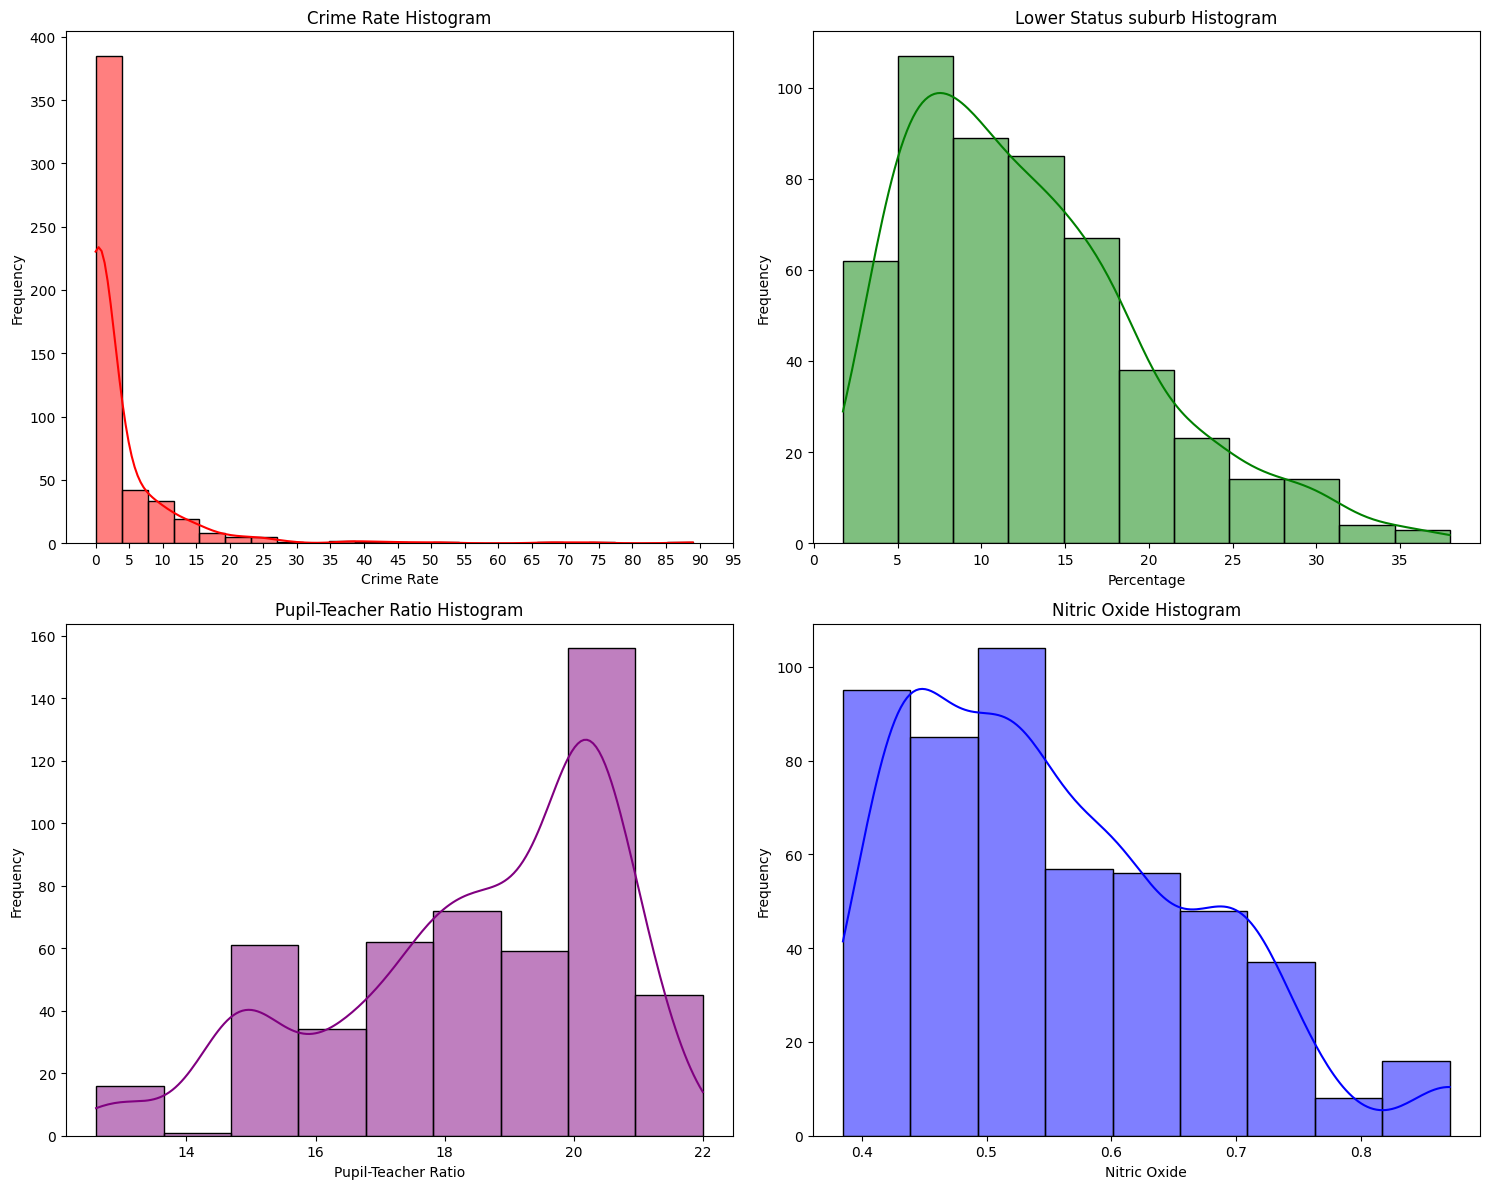

In [44]:
crimeRateHistogram = BostonHouses["crim"]
lowerStatusHistogram  = BostonHouses["lstat"]
ptRatioHistogram = BostonHouses["ptratio"]
noxHistogram = BostonHouses["nox"]

# find the right amount of bins using Scott's Rule--------------------------------------------------------------

""" 

Bin width = 3.5(std of population / n^1/3) 

Number of Bins = Range of data / Bin width

scotts_x = (Range of data / Bin width) / [3.5(std of population / n^1/3)] 

"""
#Using Len() to find the amount of number variables in each column
n_crimeRateHistogram = len(crimeRateHistogram)
n_lowerStatusHistogram = len(lowerStatusHistogram)
n_ptRatioHistogram = len(ptRatioHistogram)
n_noxHistogram = len(noxHistogram)

scotts_bins_crimeRateHistogram = int((crimeRateHistogram.max() - crimeRateHistogram.min()) / (3.5 * crimeRateHistogram.std() / (n_crimeRateHistogram**(1/3))))

scotts_bins_lowerStatusHistogram = int((lowerStatusHistogram.max() - lowerStatusHistogram.min()) / (3.5 * lowerStatusHistogram.std() / (n_lowerStatusHistogram**(1/3))))

scotts_bins_ptRatioHistogram = int((ptRatioHistogram.max() - ptRatioHistogram.min()) / (3.5 * ptRatioHistogram.std() / (n_ptRatioHistogram**(1/3))))

scotts_bins_noxHistogram = int((noxHistogram.max() - noxHistogram.min()) / (3.5 * noxHistogram.std() / (n_noxHistogram**(1/3))))

#-------------------------------------------------------------------------------------------------------------------------------------------------------

fig, ax = plt.subplots(2, 2, figsize=(15, 12))

sns.histplot(crimeRateHistogram, bins=scotts_bins_crimeRateHistogram, kde=True, color="red", ax=ax[0,0])
ax[0, 0].set_title("Crime Rate Histogram")
ax[0, 0].set_xlabel("Crime Rate")
ax[0, 0].set_ylabel("Frequency")
ax[0, 0].set_xticks(np.arange(0,100,5))

sns.histplot(lowerStatusHistogram, bins=scotts_bins_lowerStatusHistogram, kde=True, color="green", ax=ax[0,1])
ax[0, 1].set_title("Lower Status suburb Histogram")
ax[0, 1].set_xlabel("Percentage")
ax[0, 1].set_ylabel("Frequency")

sns.histplot(ptRatioHistogram, bins=scotts_bins_ptRatioHistogram, kde=True, color="purple", ax=ax[1, 0])
ax[1, 0].set_title("Pupil-Teacher Ratio Histogram")
ax[1, 0].set_xlabel("Pupil-Teacher Ratio")
ax[1, 0].set_ylabel("Frequency")

sns.histplot(noxHistogram, bins=scotts_bins_noxHistogram, kde=True, color="blue", ax=ax[1, 1])
ax[1, 1].set_title("Nitric Oxide Histogram")
ax[1, 1].set_xlabel("Nitric Oxide")
ax[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


## Crime Rate Numerical Analysis


#### Finding out if the majority of suburbs are below the 5% rate. If true, that would mean that most suburbs in Boston could be categorize as safe. 

In [91]:
mayority_crime_rates2 = BostonHouses["crim"] < 5
print(mayority_crime_rates2.value_counts())


crim
True     400
False    106
Name: count, dtype: int64


In [46]:
print(BostonHouses["crim"].mean())

3.613523557312254


In [47]:
mayority_crime_rates = BostonHouses["crim"] > BostonHouses["crim"].mean()

print(mayority_crime_rates.value_counts())

crim
False    378
True     128
Name: count, dtype: int64


In [95]:
x = 128 + 378

xRes = 378 / x

print(xRes)

highestCrim = np.max(BostonHouses["crim"])

lowestCrim = np.min(BostonHouses["crim"])

print(f"The highest crime rate is {highestCrim}")
print(f"The lowest crime rate is {lowestCrim}")

0.7470355731225297
The highest crime rate is 88.9762
The lowest crime rate is 0.00632


## Crime Rate Analysis

Based on the previous calculations, we can conclude that most of the suburbs in Boston can be considered safe. 79% of the suburbs are located below the 5% interval. The average crime rate combining all suburbs is 3.6%, which makes Boston a safe state in general.

## Lower Status Suburbs Numerical Analysis

In [48]:
print(np.mean(BostonHouses["lstat"]))

12.653063241106722


In [51]:
print(np.median(BostonHouses["lstat"])) 

11.36


In [56]:
good_status = BostonHouses["lstat"] >= 15

print(good_status.value_counts())

print(344/ 506)

print(162 / 506)

lstat
False    344
True     162
Name: count, dtype: int64
0.6798418972332015
0.3201581027667984


# Lower Status Analysis

Based on the information I have gathered, I can conclude that Boston overall is not a low status state. The histogram tells us that the majority of the suburbs lay between 10% - 15%. approximately 68% of suburbs lay below the 15% mark. However, We can conclude that Boston is high status. In the remaining 32% who are above the 15% mark we can see suburbs in the 20%s and also some in the 30%s and 35%s. We can see how the average crime rate of Boston (3.6%) correlates with the state being not low status. Typically if a state is based on a majority of low status suburbs you also find a higher crime rate. This doesn't seem to apply to Boston. It's not one of the higher status states in the US, neither it's a poor state.  

## Pupil to Teacher Ratio Numerical Analysis

In [71]:
ptRatio_mean = np.mean(BostonHouses["ptratio"]).round(2)

ptRatio_median = np.median(BostonHouses["ptratio"]).round(2)

print(f" The average pupil to teacher ratio in Bostion is {ptRatio_mean}")

print(f" The median pupil to teacher ratio in Bostion is {ptRatio_median}")


 The average pupil to teacher ratio in Bostion is 18.46
 The median pupil to teacher ratio in Bostion is 19.05


In [63]:
mayority_ptRatio =  BostonHouses["ptratio"] < 20

print(mayority_ptRatio.value_counts())

print(305/506)

print(201/506)

ptratio
True     305
False    201
Name: count, dtype: int64
0.6027667984189723
0.39723320158102765


## Pupil to Teacher Analysis

I have found that the average pupil to teacher ratio in Boston is around 1:18. According to the National Center for Education Statistics, the national ratio for grades K-12 is 15.3 students, the ratio of HS students in self-contained classes is 1:18 and 1:24 for HS students who rotate for departmentalized instructors (Brown, 2023). 

What this tells us is that on average schools in boston have a average to above ratio of students to teacher ratio. Lower ratios have been linked to improvement in test scores, significant long-term gains for minority and low-income students, increased engagement and hands-on learning opportunities, and improvements in student behavior (Brown, 2023).

Because Boston´s ratio is not low neither high, we can say that Boston´s ratio is average in the US. This doesn't mean that it's classes are overcrowded, affecting the quality of the education, but they aren't small so they can possibly don't have the benefits of small classes. However, if I would like to measure the overall quality of the education of the state, I would need to analyze more variables as drawing conclusions with a single variable would be misleading. 

Citation: 

Brown, M. (2023, May 30). Student to Teacher Ratio in High Schools. Retrieved August 9, 2024, from Learner.com website: https://www.learner.com/blog/student-to-teacher-ratio-in-high-schools

‌

## Nitric Oxide Numerical Analysis 

In [90]:
nox_mean = np.mean(BostonHouses["nox"]).round(4) * 100

nox_median = np.median(BostonHouses["nox"]).round(2) * 100

print(f" The average nitric oxide parts is {nox_mean} ppm")

print(f" The median nitric oxide parts is {nox_median} ppm")

below_recomended_nox = BostonHouses["nox"] < 22

print(below_recomended_nox.value_counts())




 The average nitric oxide parts is 55.47 ppm
 The median nitric oxide parts is 54.0 ppm
nox
True    506
Name: count, dtype: int64


## Nitrogen Oxide Analysis

The nitrogen oxide levels could be the only alarming statistic in this whole investigation. 

The World Health Organization (WHO) recommends that the concentration of nitrogen dioxide (NO₂), a major component of NOx, should not exceed 0.106 ppm (1-hour exposure) or 0.021 ppm (annual average).

Te average NO₂ levels are at an alarming rate with 0.55 ppm. This levels are literally considered toxic. The lowest levels get to 0.4ppm, which is still high. We can even consider that there are suburbs who have a ppm up to 0.8 ppm, which are astronomical levels. The quality of the air that the Boston residents have to inhale is disastrous. 

Based on the other variables investigated in this investigation, we can´t see a direct correlation. We would need to analyze other variables to find the root cause of this problem. 

It's a surprise because the data that we have collected shows us that Boston wasn't been a state with bad statistics. The variables we have like low percentages of low status suburbs made me think that higher status = cleaner environment. But as stated before we need other data to research. 

Sources: 

Amaducci, A., & Downs, J. W. (2023, July 3). Nitrogen Dioxide Toxicity. Retrieved August 10, 2024, from Nih.gov website: https://www.ncbi.nlm.nih.gov/books/NBK554539/

Center, U. (2017). Nitrogen Oxides | Center for Science Education. Retrieved August 10, 2024, from Ucar.edu website: https://scied.ucar.edu/learning-zone/air-quality/nitrogen-oxides

‌

‌



## Suburbs Near The Charles River

In [96]:
BostonHouses["chas"].value_counts()

chas
0    471
1     35
Name: count, dtype: int64

There are only 35 rivers that are build near the Charles river.

## Houses Build Before 1940

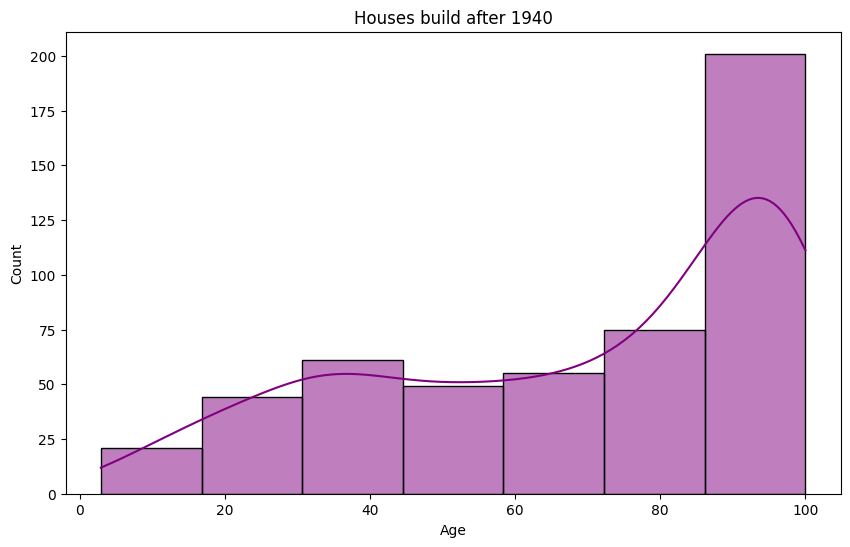

In [100]:
housesHistogram = BostonHouses["age"]

n_housesHistogram = len(housesHistogram)

scott_bins_housesHistogram = int((housesHistogram.max() - housesHistogram.min()) / (3.5 * housesHistogram.std() / n_housesHistogram**(1/3)))

plt.figure(figsize=(10, 6))
sns.histplot(housesHistogram, bins=scott_bins_housesHistogram, kde=True, color="purple",)
plt.title("Houses build after 1940")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [106]:
houses_mean = np.mean(BostonHouses["age"]).round(0) * 100

houses_median = np.median(BostonHouses["age"]).round(0) * 100

print(f" The average number of houses build before 1940 is {houses_mean}")

print(f" The median number of houses build before 1940 is {houses_median}")

below_number_houses = BostonHouses["age"] < 90

print(below_number_houses.value_counts())

print(BostonHouses["age"].max())




 The average number of houses build before 1940 is 6900.0
 The median number of houses build before 1940 is 7800.0
age
True     336
False    170
Name: count, dtype: int64
100.0


## Houses build before 1940 Analysis

Based on the behavior of the histogram, we can see that suburbs had a tendency to build more houses. We can see how many suburbs still preserve more than 60 houses and a great portion had as much as 90 to 100 houses.The average number of houses build before 1940 is 6900.0. Based on this data alone I can't tell you if this amount of houses is a significant porportion of the total average of houses of a suburb, because I don't have the numbers post 1940. 

## Correlation Between Low Status Suburbs and High Nitrogen Oxide Levels

        crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
7    0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311   
8    0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311   
9    0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311   
10   0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311   
12   0.09378  12.5   7.87     0  0.524  5.889   39.0  5.4509    5  311   
..       ...   ...    ...   ...    ...    ...    ...     ...  ...  ...   
490  0.20746   0.0  27.74     0  0.609  5.093   98.0  1.8226    4  711   
491  0.10574   0.0  27.74     0  0.609  5.983   98.8  1.8681    4  711   
495  0.17899   0.0   9.69     0  0.585  5.670   28.8  2.7986    6  391   
496  0.28960   0.0   9.69     0  0.585  5.390   72.9  2.7986    6  391   
499  0.17783   0.0   9.69     0  0.585  5.569   73.5  2.3999    6  391   

     ptratio   black  lstat  medv  
7       15.2  396.90  19.15  27.1  
8       15.2  386.63  29.93  16.5  
9  

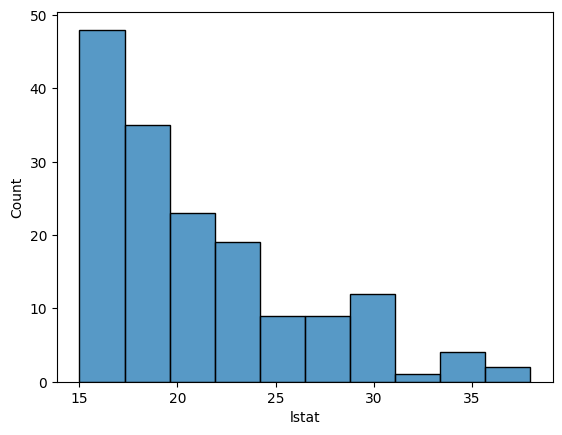

In [112]:
import matplotlib.pyplot as plt
filtered_Houses = BostonHouses[BostonHouses["lstat"] > 15]

print(filtered_Houses)

sns.histplot(data=filtered_Houses["lstat"])

plt.show()

In [124]:
high_NO_Levels = BostonHouses[(BostonHouses["lstat"] > 15) & (BostonHouses["nox"] > 0.5547)]

print(len(high_NO_Levels))

print("")

low_NO_Levels = BostonHouses[(BostonHouses["lstat"] > 15) & (BostonHouses["nox"] < 0.5547)]

print(len(low_NO_Levels))

print("")

highest_NO_Suburb = BostonHouses["nox"].iloc[-1]

print(highest_NO_Suburb)

BostonHouses["nox"].max()


125

37

0.573


np.float64(0.871)

## Comparison Graphs

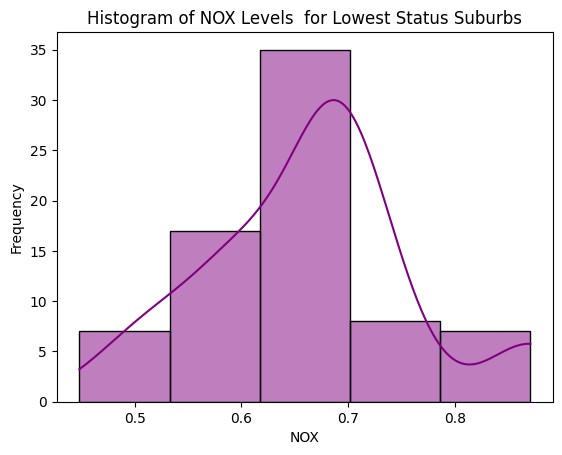

Mean:0.6646621621621622
Median:0.679


In [157]:

lowest_Status_Suburbs = BostonHouses[BostonHouses["lstat"] >= 20]

#Finding number of bins

lowest_Status_Suburbs_Histogram = lowest_Status_Suburbs["nox"]

n_lowest_Status_Suburbs_Histogram = len(lowest_Status_Suburbs_Histogram)

scott_bins_Lowest_Status_Suburbs_Histogram = int((lowest_Status_Suburbs_Histogram.max() - lowest_Status_Suburbs_Histogram.min()) / (3.5 * lowest_Status_Suburbs_Histogram.std() / n_lowest_Status_Suburbs_Histogram**(1/3)))

#Plotting

sns.histplot(data = lowest_Status_Suburbs_Histogram, bins = scott_bins_Lowest_Status_Suburbs_Histogram, kde = True, color="purple")

plt.title("Histogram of NOX Levels  for Lowest Status Suburbs")
plt.xlabel("NOX")
plt.ylabel("Frequency")
plt.show()

print("Mean:" + str(lowest_Status_Suburbs_Histogram.mean()))
print("Median:" + str(lowest_Status_Suburbs_Histogram.median()))

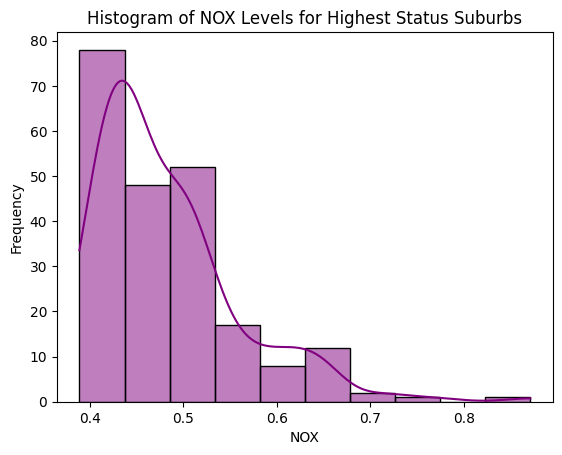

Mean:0.4825059360730593
Median:0.458
Mode:0    0.437
Name: nox, dtype: float64


In [156]:
highest_Status_Suburbs = BostonHouses[BostonHouses["lstat"] <= 10]

#Finding number of bins

highest_Status_Suburbs_Histogram = highest_Status_Suburbs["nox"]

n_Highest_Status_Suburbs_Histogram = len(highest_Status_Suburbs_Histogram)

scott_bins_Highest_Status_Suburbs_Histogram = int((highest_Status_Suburbs_Histogram.max() - highest_Status_Suburbs_Histogram.min()) / (3.5 * highest_Status_Suburbs_Histogram.std() / n_Highest_Status_Suburbs_Histogram**(1/3)))

#Plotting

sns.histplot(data = highest_Status_Suburbs_Histogram, bins = scott_bins_Highest_Status_Suburbs_Histogram, kde = True, color="purple")

plt.title("Histogram of NOX Levels for Highest Status Suburbs")
plt.xlabel("NOX")
plt.ylabel("Frequency")
plt.show()

print("Mean:" + str(highest_Status_Suburbs_Histogram.mean()))
print("Median:" + str(highest_Status_Suburbs_Histogram.median()))

## Analysis

I have found that the lower the status a suburb it has the higher the NOX levels it has. By the behavior of both graphs we can see how each one had it's cluster in one range different from each other. In the lowest status graph we see how the graph already starts at 0-5, which is higher than the starting point of the highest status graph. The lowest status also contained more suburbs with more than 0.7 NOX levels, while on the highest status it's only a few. In the lowest status graphs the average was 0.665 and in the highest status it was 0.483. However, basing on the guidelines made by the World Health Organization, we can conclude that no matter the status all of the suburbs in Boston have harmful levels of Nitrogen Oxide in their air. 